**Import all Libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle
import os

from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
print("Load Successful")

2021-08-25 13:49:05.525943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-25 13:49:05.526020: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load Successful


**upload zip file from local Directory**

In [ ]:
from google.colab import files
uploaded = files.upload()

**Unzip the file**

In [ ]:
!unzip Real.zip

In [3]:
from os import listdir
person_01 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_01")
person_02 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_02")
person_03 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_03")
person_04 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_04")
person_05 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_05")
person_06 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_06")
person_07 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_07")
person_08 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_08")
person_09 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_09")
person_10 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_10")
person_11 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_11")
person_12 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_12")
person_13 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_13")
person_14 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_14")
person_15 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_15")
person_16 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_16")
person_17 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_17")
person_18 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_18")
person_19 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_19")
person_20 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_20")
person_21 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_21")
person_22 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_22")
person_23 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_23")
person_24 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_24")
person_25 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_25")
person_26 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_26")
person_27 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_27")
person_28 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_28")
person_29 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_29")
person_30 = os.listdir ("/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/Real/person_30")

In [3]:
print("Number of signatures in person 01: {}".format(len(person_01)))

Number of signatures in person 01: 10


In [4]:
signatures = np.concatenate((person_01,person_02, person_03, person_04, person_05, person_06, person_07, person_08, person_09, 
                             person_10, person_11, person_12, person_13, person_14, person_15),axis=0)

In [ ]:
signatures

**Create Dataset**

In [4]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/preprocessed_data/"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset

In [5]:
dataset = create_dataset(person_01,1)
dataset = create_dataset(person_02,2)
dataset = create_dataset(person_03,3)
dataset = create_dataset(person_04,4)
dataset = create_dataset(person_05,5)
dataset = create_dataset(person_06,6)
dataset = create_dataset(person_07,7)
dataset = create_dataset(person_08,8)
dataset = create_dataset(person_09,9)
dataset = create_dataset(person_10,10)
dataset = create_dataset(person_11,11)
dataset = create_dataset(person_12,12)
dataset = create_dataset(person_13,13)
dataset = create_dataset(person_14,14)
dataset = create_dataset(person_15,15)
dataset = create_dataset(person_16,16)
dataset = create_dataset(person_17,17)
dataset = create_dataset(person_18,18)
dataset = create_dataset(person_19,19)
dataset = create_dataset(person_20,20)
dataset = create_dataset(person_21,21)
dataset = create_dataset(person_22,22)
dataset = create_dataset(person_23,23)
dataset = create_dataset(person_24,24)
dataset = create_dataset(person_25,25)
dataset = create_dataset(person_26,26)
dataset = create_dataset(person_27,27)
dataset = create_dataset(person_28,28)
dataset = create_dataset(person_29,29)
dataset = create_dataset(person_30,30)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 587.78it/s]


In [ ]:
dataset1

**Plot the data**

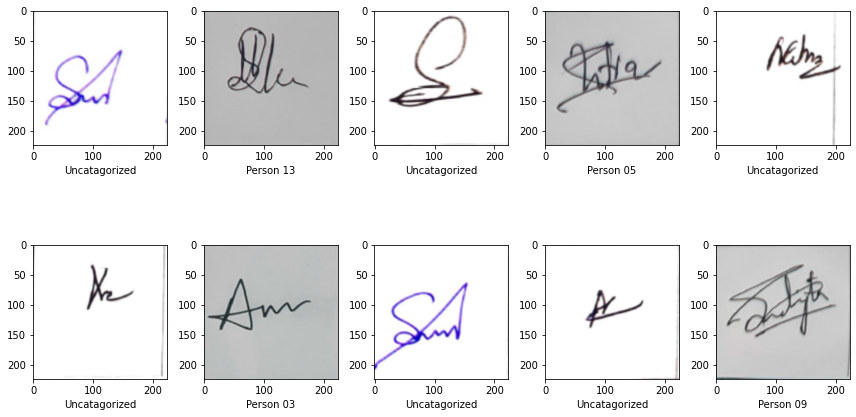

In [7]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 1:
        label = "Person 01"
    elif category== 2:
        label = "Person 02"
    elif category== 3:
        label = "Person 03"
    elif category== 4:
        label = "Person 04"
    elif category== 5:
        label = "Person 05"
    elif category== 6:
        label = "Person 06"
    elif category== 7:
        label = "Person 07"
    elif category== 8:
        label = "Person 08"
    elif category== 9:
        label = "Person 09"
    elif category== 10:
        label = "Person 10"
    elif category== 11:
        label = "Person 11"
    elif category== 12:
        label = "Person 12"
    elif category== 13:
        label = "Person 13"
    elif category== 14:
        label = "Person 14"
    elif category== 15:
        label = "Person 15"
    else:
        label = "Uncatagorized"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()    

**Dividing dataset into x(features) & y(target)**

In [6]:
X = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [8]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(240, 224, 224, 3) (240,)
(60, 224, 224, 3) (60,)


In [ ]:
y_train1

In [9]:
from tensorflow.keras.utils import to_categorical
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [10]:
print((X_train.shape,y_train1.shape))
print((X_test.shape,y_test1.shape))

((240, 224, 224, 3), (240, 31))
((60, 224, 224, 3), (60, 31))


In [ ]:
#Image Data Augmentation
train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True, zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True, zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train1)
test_generator.fit(x_test1)

**creating model NN**

In [13]:
from keras.applications.vgg16 import VGG16, preprocess_input
vgg16_weight_path = '/home/rafsunsheikh/Desktop/AI_agent/signatureFraud/static/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
vgg = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=(224,224,3)
)

2021-08-25 11:35:06.623016: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-25 11:35:06.624329: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-25 11:35:06.624694: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-08-25 11:35:06.624954: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-08-25 11:35:06.625208: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [14]:
for layer in vgg.layers:
    layer.trainable = False

In [15]:
from tensorflow.keras import Sequential
from keras import layers
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(Dense(128, activation='sigmoid'))
model.add(layers.Dropout(rate=0.2))
model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(Flatten())
model.add(Dense(31,activation="sigmoid"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
dense (Dense)                (None, 7, 7, 256)         131328    
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 256)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 7, 7, 128)         32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 7, 7, 128)         16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 128)         0

In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [18]:
# history = model.fit(x_train,y_train,batch_size=32,epochs=80,validation_data=(x_test,y_test))
history = model.fit(X_train,y_train1,batch_size=32,epochs=80,validation_data=(X_test,y_test1))

2021-08-25 11:35:20.163109: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2021-08-25 11:35:22.049468: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2021-08-25 11:35:22.474364: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 411041792 exceeds 10% of free system memory.
2021-08-25 11:35:23.348938: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.
2021-08-25 11:35:23.440414: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.
2021-08-25 11:35:23.835147: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.


8/8 [==============================] - 64s 8s/step - loss: 0.2755 - accuracy: 0.0500 - val_loss: 0.1672 - val_accuracy: 0.0500
Epoch 2/80
8/8 [==============================] - 71s 9s/step - loss: 0.1585 - accuracy: 0.0375 - val_loss: 0.2371 - val_accuracy: 0.0333
Epoch 3/80
8/8 [==============================] - 67s 9s/step - loss: 0.1491 - accuracy: 0.0708 - val_loss: 0.1457 - val_accuracy: 0.1333
Epoch 4/80
8/8 [==============================] - 66s 8s/step - loss: 0.1389 - accuracy: 0.1375 - val_loss: 0.1381 - val_accuracy: 0.2833
Epoch 5/80
8/8 [==============================] - 68s 9s/step - loss: 0.1311 - accuracy: 0.2750 - val_loss: 0.1609 - val_accuracy: 0.4667
Epoch 6/80
8/8 [==============================] - 67s 9s/step - loss: 0.1262 - accuracy: 0.3917 - val_loss: 0.1338 - val_accuracy: 0.4667
Epoch 7/80
8/8 [==============================] - 67s 9s/step - loss: 0.1188 - accuracy: 0.5250 - val_loss: 0.1304 - val_accuracy: 0.5167
Epoch 8/80
8/8 [=============================

8/8 [==============================] - 63s 8s/step - loss: 2.0551e-04 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.8667
Epoch 60/80
8/8 [==============================] - 63s 8s/step - loss: 1.8817e-04 - accuracy: 1.0000 - val_loss: 0.0307 - val_accuracy: 0.8667
Epoch 61/80
8/8 [==============================] - 63s 8s/step - loss: 2.1779e-04 - accuracy: 1.0000 - val_loss: 0.0298 - val_accuracy: 0.8667
Epoch 62/80
8/8 [==============================] - 63s 8s/step - loss: 1.7181e-04 - accuracy: 1.0000 - val_loss: 0.0294 - val_accuracy: 0.8667
Epoch 63/80
8/8 [==============================] - 63s 8s/step - loss: 2.0003e-04 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.8833
Epoch 64/80
8/8 [==============================] - 63s 8s/step - loss: 1.7354e-04 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.8833
Epoch 65/80
8/8 [==============================] - 63s 8s/step - loss: 1.6890e-04 - accuracy: 1.0000 - val_loss: 0.0304 - val_accuracy: 0.8833
Epoch 66/80

**Precision Recall F1 Confusion Matrix NN**

In [19]:
# Model Performance for train Dataset
y_pred = model.predict(X_train)
y_pred = np.argmax(y_pred, axis=1)
y_train = np.argmax(y_train1, axis=1)

acc_train=format(accuracy_score(y_pred, y_train),'.3f')
precision_train=format(precision_score(y_train, y_pred, average='micro'),'.3f')
recall_train=format(recall_score(y_train, y_pred, average='micro'),'.3f')
f1_train=format(f1_score(y_train, y_pred, average='micro'),'.3f')

cnf_matrix_train = confusion_matrix(y_pred, y_train)
print("Confusion Matrix of RFC train:\n")
print(cnf_matrix_train)

FP = cnf_matrix_train.sum(axis=0) - np.diag(cnf_matrix_train) 
FN = cnf_matrix_train.sum(axis=1) - np.diag(cnf_matrix_train)
TP = np.diag(cnf_matrix_train)
TN = cnf_matrix_train.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_train = TNR

# Model Performance for test Dataset
y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test1, axis=1)

acc_test=format(accuracy_score(y_test_pred, y_test),'.3f')
precision_test=format(precision_score(y_test, y_test_pred, average='micro'),'.3f')
recall_test=format(recall_score(y_test, y_test_pred, average='micro'),'.3f')
f1_test=format(f1_score(y_test, y_test_pred, average='micro'),'.3f')

cnf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("Confusion Matrix of RFC test:\n")
print(cnf_matrix_test)

FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_test = TNR

evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Specificity(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[],
                           'Specificity(test)':[],
                          })

r = evaluation.shape[0]
evaluation.loc[r] = ['VGG16',acc_train,precision_train,recall_train,f1_train,specificity_train,acc_test,precision_test,recall_test,f1_test,specificity_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

Confusion Matrix of RFC train:

[[9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Specificity(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test),Specificity(test)
0,VGG16,1.000,1.000,1.000,1.000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.883,0.883,0.883,0.883,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9830508474576..."


**ROC Curve NN**

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


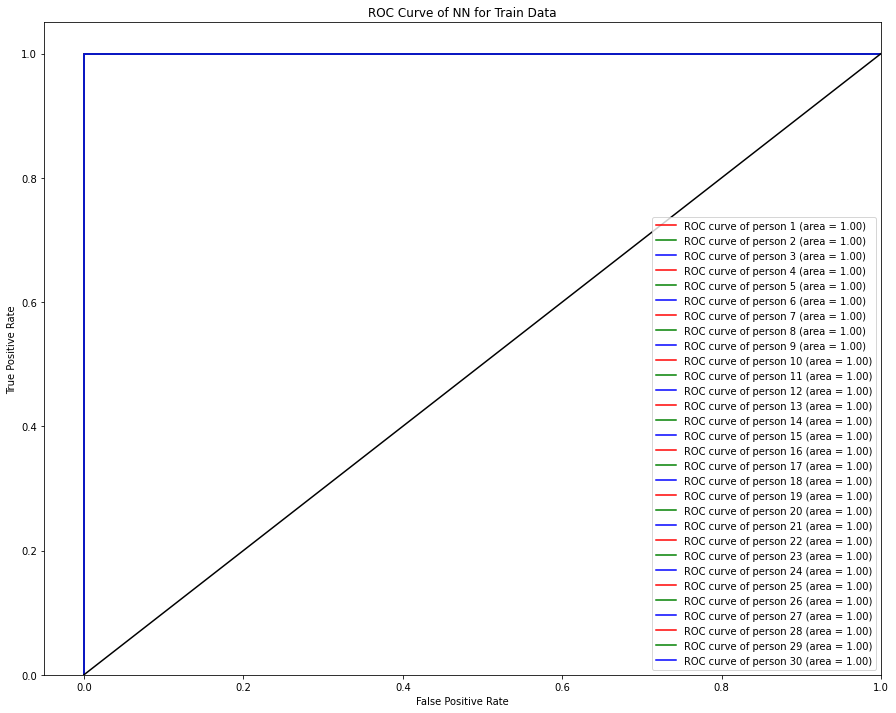

1.0


/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


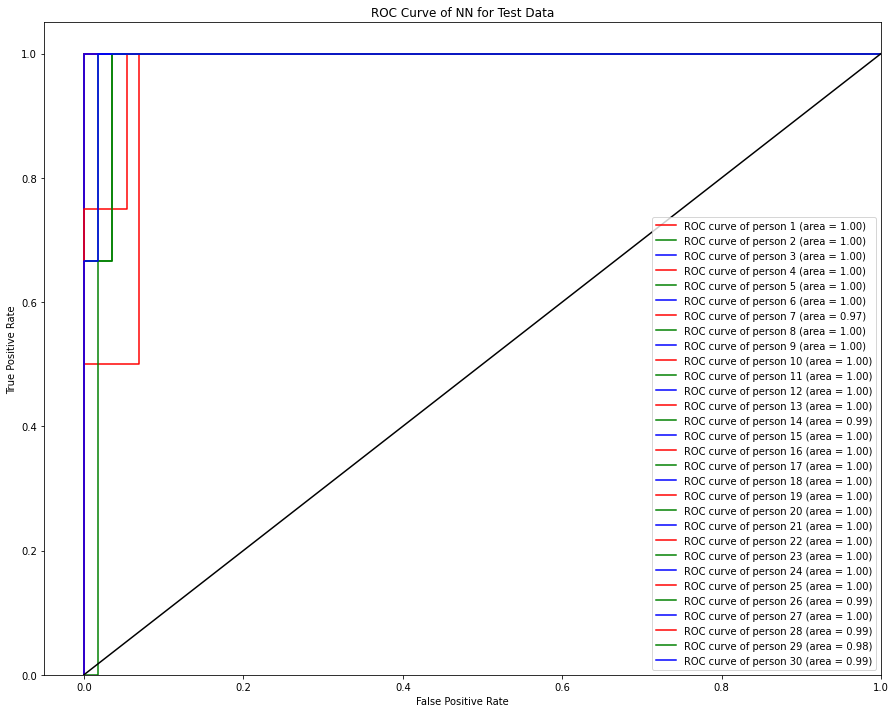

0.9968446919501819


In [29]:
y_score_train = model.predict(X_train)

n_classes = y_train1.shape[1]
# n_classes = n_classes - 1
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize = (15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train1[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of NN for Train Data')
plt.legend(loc="lower right")
plt.show()

del roc_auc[0]
filtered_vals = [v for _, v in roc_auc.items() if v != 0]
average_auc_train = sum(filtered_vals) / len(filtered_vals)
print(average_auc_train)




y_score_test = model.predict(X_test)

n_classes = y_train1.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
plt.figure(figsize = (15,12))
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of NN for Test Data')
plt.legend(loc="lower right")
plt.show()

del roc_auc[0]
filtered_vals = [v for _, v in roc_auc.items() if v != 0]
average_auc_test = sum(filtered_vals) / len(filtered_vals)
print(average_auc_test)

In [28]:
del roc_auc[0]
roc_auc

{1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 0.9655172413793103,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 0.9883040935672515,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0,
 25: 1.0,
 26: 0.9941520467836257,
 27: 1.0,
 28: 0.9866071428571428,
 29: 0.9766081871345029,
 30: 0.9941520467836257}

**Support Vector Machine**

In [11]:
nsamples, nx, ny, nz = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nz))

nsamples, nx, ny, nz = X_test.shape
X_test2 = X_test.reshape((nsamples,nx*ny*nz))

In [12]:
rbf = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=0)).fit(X_train2, y_train)
# rbf = svm.SVC(kernel='rbf', gamma = 1, C=1, decision_function_shape='ovo').fit(X_train2, y_train)
# rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train2, y_train)
# poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train2, y_train)
# sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train2, y_train)

# linear_pred_train = linear.predict(X_train2)
# poly_pred_train = poly.predict(X_train2)
# rbf_pred_train = rbf.predict(X_train2)
# sig_pred_train = sig.predict(X_train2)

# linear_pred_test = linear.predict(X_test2)
# poly_pred_test = poly.predict(X_test2)
# rbf_pred_test = rbf.predict(X_test2)
# sig_pred_test = sig.predict(X_test2)

# accuracy_lin_test = linear.score(X_test2, y_test)
# accuracy_poly_test = poly.score(X_test2, y_test)
# accuracy_rbf_test = rbf.score(X_test2, y_test)
# accuracy_sig_test = sig.score(X_test2, y_test)

# print("Accuracy Linear Kernel test:", accuracy_lin_test)
# print("Accuracy Polynomial Kernel test:", accuracy_poly_test)
# print("Accuracy Radial Basis Kernel test:", accuracy_rbf_test)
# print("Accuracy Sigmoid Kernel test:", accuracy_sig_test)
# print("\n")
# accuracy_lin_train = linear.score(X_train2, y_train)
# accuracy_poly_train = poly.score(X_train2, y_train)
# accuracy_rbf_train = rbf.score(X_train2, y_train)
# accuracy_sig_train = sig.score(X_train2, y_train)

# print("Accuracy Linear Kernel train:", accuracy_lin_train)
# print("Accuracy Polynomial Kernel train:", accuracy_poly_train)
# print("Accuracy Radial Basis Kernel train:", accuracy_rbf_train)
# print("Accuracy Sigmoid Kernel train:", accuracy_sig_train)      




In [13]:
y_pred_rbf = rbf.predict(X_train2)
# y_pred_rbf = rbf.predict(X_train2)
# y_pred_poly = poly.predict(X_train2)
# y_pred_sig = sig.predict(X_train2)

y_train = np.argmax(y_train1, axis=1)


y_test_pred_rbf = rbf.predict(X_test2)
# y_test_pred_rbf = rbf.predict(X_test2)
# y_test_pred_poly = poly.predict(X_test2)
# y_test_pred_sig = sig.predict(X_test2)

y_test = np.argmax(y_test1, axis=1)



acc_train_rbf=format(accuracy_score(y_pred_rbf, y_train),'.3f')
# acc_train_rbf=format(accuracy_score(y_pred_rbf, y_train),'.3f')
# acc_train_poly=format(accuracy_score(y_pred_poly, y_train),'.3f')
# acc_train_sig=format(accuracy_score(y_pred_sig, y_train),'.3f')

precision_train_rbf=format(precision_score(y_train, y_pred_rbf, average='micro'),'.3f')
# precision_train_rbf=format(precision_score(y_train, y_pred_rbf, average='micro'),'.3f')
# precision_train_poly=format(precision_score(y_train, y_pred_poly, average='micro'),'.3f')
# precision_train_sig=format(precision_score(y_train, y_pred_sig, average='micro'),'.3f')

recall_train_rbf=format(recall_score(y_train, y_pred_rbf, average='micro'),'.3f')
# recall_train_rbf=format(recall_score(y_train, y_pred_rbf, average='micro'),'.3f')
# recall_train_poly=format(recall_score(y_train, y_pred_poly, average='micro'),'.3f')
# recall_train_sig=format(recall_score(y_train, y_pred_sig, average='micro'),'.3f')

f1_train_rbf=format(f1_score(y_train, y_pred_rbf, average='micro'),'.3f')
# f1_train_rbf=format(f1_score(y_train, y_pred_rbf, average='micro'),'.3f')
# f1_train_poly=format(f1_score(y_train, y_pred_poly, average='micro'),'.3f')
# f1_train_sig=format(f1_score(y_train, y_pred_sig, average='micro'),'.3f')

cnf_matrix_train_rbf = confusion_matrix(y_pred_rbf, y_train)
# cnf_matrix_train_rbf = confusion_matrix(y_pred_rbf, y_train)
# cnf_matrix_train_poly = confusion_matrix(y_pred_poly, y_train)
# cnf_matrix_train_sig = confusion_matrix(y_pred_sig, y_train)


FP = cnf_matrix_train_rbf.sum(axis=0) - np.diag(cnf_matrix_train_rbf) 
FN = cnf_matrix_train_rbf.sum(axis=1) - np.diag(cnf_matrix_train_rbf)
TP = np.diag(cnf_matrix_train_rbf)
TN = cnf_matrix_train_rbf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_train_rbf = TNR

# FP = cnf_matrix_train_rbf.sum(axis=0) - np.diag(cnf_matrix_train_rbf) 
# FN = cnf_matrix_train_rbf.sum(axis=1) - np.diag(cnf_matrix_train_rbf)
# TP = np.diag(cnf_matrix_train_rbf)
# TN = cnf_matrix_train_rbf.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# specificity_train_rbf = TNR

# FP = cnf_matrix_train_poly.sum(axis=0) - np.diag(cnf_matrix_train_poly) 
# FN = cnf_matrix_train_poly.sum(axis=1) - np.diag(cnf_matrix_train_poly)
# TP = np.diag(cnf_matrix_train_poly)
# TN = cnf_matrix_train_poly.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# specificity_train_poly = TNR

# FP = cnf_matrix_train_sig.sum(axis=0) - np.diag(cnf_matrix_train_sig) 
# FN = cnf_matrix_train_sig.sum(axis=1) - np.diag(cnf_matrix_train_sig)
# TP = np.diag(cnf_matrix_train_sig)
# TN = cnf_matrix_train_sig.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# specificity_train_sig = TNR




acc_test_rbf=format(accuracy_score(y_test_pred_rbf, y_test),'.3f')
# acc_test_rbf=format(accuracy_score(y_test_pred_rbf, y_test),'.3f')
# acc_test_poly=format(accuracy_score(y_test_pred_poly, y_test),'.3f')
# acc_test_sig=format(accuracy_score(y_test_pred_sig, y_test),'.3f')

precision_test_rbf=format(precision_score(y_test, y_test_pred_rbf, average='micro'),'.3f')
# precision_test_rbf=format(precision_score(y_test, y_test_pred_rbf, average='micro'),'.3f')
# precision_test_poly=format(precision_score(y_test, y_test_pred_poly, average='micro'),'.3f')
# precision_test_sig=format(precision_score(y_test, y_test_pred_sig, average='micro'),'.3f')

recall_test_rbf=format(recall_score(y_test, y_test_pred_rbf, average='micro'),'.3f')
# recall_test_rbf=format(recall_score(y_test, y_test_pred_rbf, average='micro'),'.3f')
# recall_test_poly=format(recall_score(y_test, y_test_pred_poly, average='micro'),'.3f')
# recall_test_sig=format(recall_score(y_test, y_test_pred_sig, average='micro'),'.3f')

f1_test_rbf=format(f1_score(y_test, y_test_pred_rbf, average='micro'),'.3f')
# f1_test_rbf=format(f1_score(y_test, y_test_pred_rbf, average='micro'),'.3f')
# f1_test_poly=format(f1_score(y_test, y_test_pred_poly, average='micro'),'.3f')
# f1_test_sig=format(f1_score(y_test, y_test_pred_sig, average='micro'),'.3f')

cnf_matrix_test_rbf = confusion_matrix(y_test_pred_rbf, y_test)
# cnf_matrix_test_rbf = confusion_matrix(y_test_pred_rbf, y_test)
# cnf_matrix_test_poly = confusion_matrix(y_test_pred_poly, y_test)
# cnf_matrix_test_sig = confusion_matrix(y_test_pred_sig, y_test)

FP = cnf_matrix_test_rbf.sum(axis=0) - np.diag(cnf_matrix_test_rbf) 
FN = cnf_matrix_test_rbf.sum(axis=1) - np.diag(cnf_matrix_test_rbf)
TP = np.diag(cnf_matrix_test_rbf)
TN = cnf_matrix_test_rbf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_test_rbf = TNR

# FP = cnf_matrix_test_rbf.sum(axis=0) - np.diag(cnf_matrix_test_rbf) 
# FN = cnf_matrix_test_rbf.sum(axis=1) - np.diag(cnf_matrix_test_rbf)
# TP = np.diag(cnf_matrix_test_rbf)
# TN = cnf_matrix_test_rbf.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# specificity_test_rbf = TNR

# FP = cnf_matrix_test_poly.sum(axis=0) - np.diag(cnf_matrix_test_poly) 
# FN = cnf_matrix_test_poly.sum(axis=1) - np.diag(cnf_matrix_test_poly)
# TP = np.diag(cnf_matrix_test_poly)
# TN = cnf_matrix_test_poly.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# specificity_test_poly = TNR

# FP = cnf_matrix_test_sig.sum(axis=0) - np.diag(cnf_matrix_test_sig) 
# FN = cnf_matrix_test_sig.sum(axis=1) - np.diag(cnf_matrix_test_sig)
# TP = np.diag(cnf_matrix_test_sig)
# TN = cnf_matrix_test_sig.sum() - (FP + FN + TP)
# FP = FP.astype(float)
# FN = FN.astype(float)
# TP = TP.astype(float)
# TN = TN.astype(float)
# TPR = TP/(TP+FN)
# TNR = TN/(TN+FP)
# specificity_test_sig = TNR

# evaluation = pd.DataFrame({'Model': [],
#                            'Accuracy Linear (train)':[],
#                            'Accuracy rbf (train)':[],
#                            'Accuracy poly (train)':[],
#                            'Accuracy sig (train)':[],
#                            'Precision linear (train)':[],
#                            'Precision rbf (train)':[],
#                            'Precision poly (train)':[],
#                            'Precision sig (train)':[],
#                            'Recall linear (train)':[],
#                            'Recall rbf (train)':[],
#                            'Recall poly (train)':[],
#                            'Recall sig (train)':[],
#                            'F1_score linear (train)':[],
#                            'F1_score rbf (train)':[],
#                            'F1_score poly (train)':[],
#                            'F1_score sig (train)':[],
#                            'Specificity linear (train)':[],
#                            'Specificity rbf (train)':[],
#                            'Specificity poly (train)':[],
#                            'Specificity sig (train)':[],
#                            'Accuracy linear (test)':[],
#                            'Accuracy rbf (test)':[],
#                            'Accuracy poly (test)':[],
#                            'Accuracy sig (test)':[],
#                            'Precision linear (test)':[],
#                            'Precision rbf (test)':[],
#                            'Precision poly (test)':[],
#                            'Precision sig (test)':[],
#                            'Recalll linear (test)':[],
#                            'Recalll rbf (test)':[],
#                            'Recalll poly (test)':[],
#                            'Recalll sig (test)':[],
#                            'F1_score linear (test)':[],
#                            'F1_score rbf (test)':[],
#                            'F1_score poly (test)':[],
#                            'F1_score sig (test)':[],
#                            'Specificity linear (test)':[],
#                            'Specificity rbf (test)':[],
#                            'Specificity poly (test)':[],
#                            'Specificity sig (test)':[],
#                           })

# r = evaluation.shape[0]
# evaluation.loc[r] = ['SVM',acc_train_linear,acc_train_rbf,acc_train_poly,acc_train_sig,precision_train_linear,precision_train_rbf,precision_train_poly,precision_train_sig,recall_train_linear,recall_train_rbf,recall_train_poly,recall_train_sig,f1_train_linear,f1_train_rbf,f1_train_poly,f1_train_sig,specificity_train_linear,specificity_train_rbf,specificity_train_poly,specificity_train_sig,acc_test_linear,acc_test_rbf,acc_test_poly,acc_test_sig,precision_test_linear,precision_test_rbf,precision_test_poly,precision_test_sig,recall_test_linear,recall_test_rbf,recall_test_poly,recall_test_sig,f1_test_linear,f1_test_rbf,f1_test_poly,f1_test_sig,specificity_test_linear,specificity_test_rbf,specificity_test_poly,specificity_test_sig]
# evaluation.sort_values(by = 'Accuracy linear (test)', ascending=False)


evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Specificity(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[],
                           'Specificity(test)':[],
                          })

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM',acc_train_rbf,precision_train_rbf,recall_train_rbf,f1_train_rbf,specificity_train_rbf,acc_test_rbf,precision_test_rbf,recall_test_rbf,f1_test_rbf,specificity_test_rbf]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

/tmp/ipykernel_14545/2769131169.py:128: RuntimeWarning: invalid value encountered in true_divide
  TPR = TP/(TP+FN)
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Specificity(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test),Specificity(test)
0,SVM,1.000,1.000,1.000,1.000,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.583,0.583,0.583,0.583,"[1.0, 0.9824561403508771, 1.0, 1.0, 1.0, 0.949..."


In [14]:
# print(y_test_pred_rbf)
# print(y_test)
# print(y_pred_rbf)
# print(y_train)
# print(X_test)
print(X_train2.shape)
print(X_test2.shape)

(240, 150528)
(60, 150528)


**ROC Curve SVM**

In [ ]:
#We define the model as an SVC in OneVsRestClassifier setting.
#this means that the model will be used for class 1 vs class 2, 
#class 2vs class 3 and class 1 vs class 3. So, we have 3 cases at 
#the end and within each case, the bias will be varied in order to 
#get the ROC curve of the given case - 3 ROC curves as output.
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True, random_state=0))

y_score_train = classifier.fit(X_train2, y_train1).predict_proba(X_train2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize = (15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train1[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM for Train Data')
plt.legend(loc="lower right")
plt.show()

del roc_auc[0]
filtered_vals = [v for _, v in roc_auc.items() if v != 0]
average_auc_train = sum(filtered_vals) / len(filtered_vals)
print("average auc train:", average_auc_train)


y_score_test = classifier.fit(X_train2, y_train1).predict_proba(X_test2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize = (15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of SVM for Test Data')
plt.legend(loc="lower right")
plt.show()

del roc_auc[0]
filtered_vals = [v for _, v in roc_auc.items() if v != 0]
average_auc_test = sum(filtered_vals) / len(filtered_vals)
print("average auc test", average_auc_test)

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %


**Random Forest Classifier**

In [ ]:
clf =OneVsRestClassifier(RandomForestClassifier(n_estimators=10, random_state=500))

clf.fit(X_train2, y_train1)

In [ ]:
acc_train=format(accuracy_score(clf.predict(X_train2), y_train1),'.3f')
precision_train=format(precision_score(y_train1, clf.predict(X_train2), average='macro'),'.3f')
recall_train=format(recall_score(y_train1,clf.predict(X_train2), average='macro'),'.3f')
f1_train=format(f1_score(y_train1,clf.predict(X_train2), average='macro'),'.3f')

y_pred = clf.predict(X_train2)
y_pred = np.argmax(y_pred, axis=1)
y_train = np.argmax(y_train1, axis=1)

cnf_matrix_train = confusion_matrix(y_pred, y_train)
print("Confusion Matrix of RFC train:\n")
print(cnf_matrix_train)

FP = cnf_matrix_train.sum(axis=0) - np.diag(cnf_matrix_train) 
FN = cnf_matrix_train.sum(axis=1) - np.diag(cnf_matrix_train)
TP = np.diag(cnf_matrix_train)
TN = cnf_matrix_train.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_train = TNR


acc_test=format(accuracy_score(clf.predict(X_test2), y_test1),'.3f')
precision_test=format(precision_score(y_test1, clf.predict(X_test2), average='macro'),'.3f')
recall_test=format(recall_score(y_test1, clf.predict(X_test2), average='macro'),'.3f')
f1_test=format(f1_score(y_test1, clf.predict(X_test2), average='macro'),'.3f')

y_test_pred = clf.predict(X_test2)
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test1, axis=1)


cnf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("Confusion Matrix of RFC test:\n")
print(cnf_matrix_test)

FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_test = TNR

evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Specificity(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[],
                           'Specificity(test)':[],
                          })

r = evaluation.shape[0]
evaluation.loc[r] = ['RFC',acc_train,precision_train,recall_train,f1_train,specificity_train,acc_test,precision_test,recall_test,f1_test,specificity_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)


**ROC Curve RF**

In [ ]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=10, random_state=500))

y_score_train = classifier.fit(X_train2, y_train1).predict_proba(X_train2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train1[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RF for Train Data')
plt.legend(loc="lower right")
plt.show()




y_score_test = classifier.fit(X_train2, y_train1).predict_proba(X_test2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of RF for Test Data')
plt.legend(loc="lower right")
plt.show()

**K-Nearest Neighbours**

In [ ]:
knn_clf=OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 5))

knn_clf.fit(X_train2,y_train1)

In [ ]:
acc_train=format(accuracy_score(knn_clf.predict(X_train2), y_train1),'.3f')
precision_train=format(precision_score(y_train1, knn_clf.predict(X_train2), average='macro'),'.3f')
recall_train=format(recall_score(y_train1, knn_clf.predict(X_train2), average='macro'),'.3f')
f1_train=format(f1_score(y_train1, knn_clf.predict(X_train2), average='macro'),'.3f')

y_pred = knn_clf.predict(X_train2)
y_pred = np.argmax(y_pred, axis=1)
y_train = np.argmax(y_train1, axis=1)


cnf_matrix_train = confusion_matrix(y_pred, y_train)
print("Confusion Matrix of KNN train:\n")
print(cnf_matrix_train)
# print(cnf_matrix_train)

FP = cnf_matrix_train.sum(axis=0) - np.diag(cnf_matrix_train) 
FN = cnf_matrix_train.sum(axis=1) - np.diag(cnf_matrix_train)
TP = np.diag(cnf_matrix_train)
TN = cnf_matrix_train.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_train = TNR


acc_test=format(accuracy_score(knn_clf.predict(X_test2), y_test1),'.3f')
precision_test=format(precision_score(y_test1, knn_clf.predict(X_test2), average='macro'),'.3f')
recall_test=format(recall_score(y_test1, knn_clf.predict(X_test2), average='macro'),'.3f')
f1_test=format(f1_score(y_test1, knn_clf.predict(X_test2), average='macro'),'.3f')


y_test_pred = knn_clf.predict(X_test2)
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test1, axis=1)


cnf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("Confusion Matrix of KNN test:\n")
print(cnf_matrix_test)

FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_test = TNR

evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Specificity(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[],
                           'Specificity(test)':[],
                          })

r = evaluation.shape[0]
evaluation.loc[r] = ['KNN',acc_train,precision_train,recall_train,f1_train,specificity_train,acc_test,precision_test,recall_test,f1_test,specificity_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

**ROC Curve KNN**

In [ ]:
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = 5))

In [ ]:
y_score_train = classifier.fit(X_train2, y_train1).predict_proba(X_train2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train1[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of KNN for Train Data')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_score_test = classifier.fit(X_train2, y_train1).predict_proba(X_test2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROc Curve of KNN for Test Data')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

In [ ]:
dt_clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

dt_clf.fit(X_train2, y_train1)

In [ ]:
acc_train=format(accuracy_score(dt_clf.predict(X_train2), y_train1),'.3f')
precision_train=format(precision_score(y_train1, dt_clf.predict(X_train2), average='macro'),'.3f')
recall_train=format(recall_score(y_train1, dt_clf.predict(X_train2), average='macro'),'.3f')
f1_train=format(f1_score(y_train1, dt_clf.predict(X_train2), average='macro'),'.3f')

y_pred = dt_clf.predict(X_train2)
y_pred = np.argmax(y_pred, axis=1)
y_train = np.argmax(y_train1, axis=1)

cnf_matrix_train = confusion_matrix(y_pred, y_train)
print("Confusion Matrix of DT train:\n")
print(cnf_matrix_train)

FP = cnf_matrix_train.sum(axis=0) - np.diag(cnf_matrix_train) 
FN = cnf_matrix_train.sum(axis=1) - np.diag(cnf_matrix_train)
TP = np.diag(cnf_matrix_train)
TN = cnf_matrix_train.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_train = TNR


acc_test=format(accuracy_score(dt_clf.predict(X_test2), y_test1),'.3f')
precision_test=format(precision_score(y_test1, dt_clf.predict(X_test2), average='macro'),'.3f')
recall_test=format(recall_score(y_test1, dt_clf.predict(X_test2), average='macro'),'.3f')
f1_test=format(f1_score(y_test1, dt_clf.predict(X_test2), average='macro'),'.3f')


y_test_pred = dt_clf.predict(X_test2)
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test1, axis=1)


cnf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("Confusion Matrix of DT test:\n")
print(cnf_matrix_test)

FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test) 
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
specificity_test = TNR

evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Specificity(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[],
                           'Specificity(test)':[],
                          })

r = evaluation.shape[0]
evaluation.loc[r] = ['DT',acc_train,precision_train,recall_train,f1_train,specificity_train,acc_test,precision_test,recall_test,f1_test,specificity_test]
evaluation.sort_values(by = 'Accuracy(test)', ascending=False)

**ROC Curve DT**

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agen

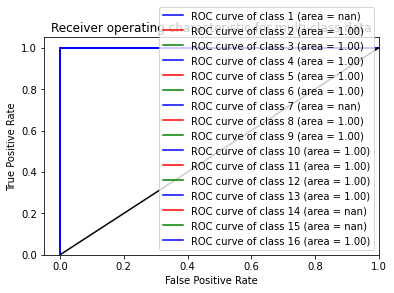

In [31]:
classifier = OneVsRestClassifier(DecisionTreeClassifier(random_state=0))

y_score_train = classifier.fit(X_train2, y_train1).predict_proba(X_train2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train1[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of DT for Train Data')
plt.legend(loc="lower right")
plt.show()





y_score_test = classifier.fit(X_train2, y_train1).predict_proba(X_test2)

n_classes = y_train1.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(15,12))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    if i == 0:
      continue
    else:
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of person {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROc Curve of DT for Test Data')
plt.legend(loc="lower right")
plt.show()

**Extra**

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agen

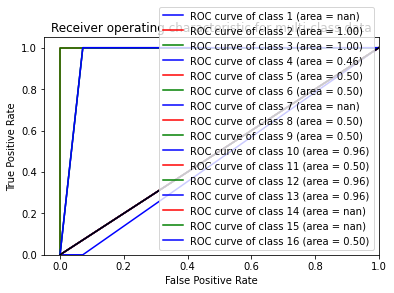

In [36]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 1:
        label = "Person 01"
    elif category== 2:
        label = "Person 02"
    elif category== 3:
        label = "Person 03"
    elif category== 4:
        label = "Person 04"
    elif category== 5:
        label = "Person 05"
    elif category== 6:
        label = "Person 06"
    elif category== 7:
        label = "Person 07"
    elif category== 8:
        label = "Person 08"
    elif category== 9:
        label = "Person 09"
    elif category== 10:
        label = "Person 10"
    elif category== 11:
        label = "Person 11"
    elif category== 12:
        label = "Person 12"
    elif category== 13:
        label = "Person 13"
    elif category== 14:
        label = "Person 14"
    elif category== 15:
        label = "Person 15"
    else:
        label = "Uncatagorized"
        
    if pred_category== 1:
        pred_label = "Person 01"
    elif pred_category== 2:
        pred_label = "Person 02"
    elif pred_category== 3:
        pred_label = "Person 03"
    elif pred_category== 4:
        pred_label = "Person 04"
    elif pred_category== 5:
        pred_label = "Person 05"
    elif pred_category== 6:
        pred_label = "Person 06"
    elif pred_category== 7:
        pred_label = "Person 07"
    elif pred_category== 8:
        pred_label = "Person 08"
    elif pred_category== 9:
        pred_label = "Person 09"
    elif pred_category== 10:
        pred_label = "Person 10"
    elif pred_category== 11:
        pred_label = "Person 11"
    elif pred_category== 12:
        pred_label = "Person 12"
    elif pred_category== 13:
        pred_label = "Person 13"
    elif pred_category== 14:
        pred_label = "Person 14"
    elif pred_category== 15:
        pred_label = "Person 15"
    else:
        pred_label = "Uncatagorized"

        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agen

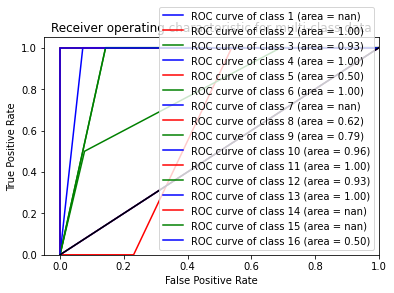

In [59]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 1:
        label = "Person 01"
    elif category== 2:
        label = "Person 02"
    elif category== 3:
        label = "Person 03"
    elif category== 4:
        label = "Person 04"
    elif category== 5:
        label = "Person 05"
    elif category== 6:
        label = "Person 06"
    elif category== 7:
        label = "Person 07"
    elif category== 8:
        label = "Person 08"
    elif category== 9:
        label = "Person 09"
    elif category== 10:
        label = "Person 10"
    elif category== 11:
        label = "Person 11"
    elif category== 12:
        label = "Person 12"
    elif category== 13:
        label = "Person 13"
    elif category== 14:
        label = "Person 14"
    elif category== 15:
        label = "Person 15"
    else:
        label = "Uncatagorized"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()    

**Confusion Matrix**

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agen

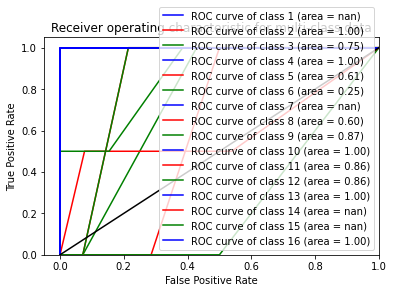

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

**Precision Recall F1 Score**

/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
/home/rafsunsheikh/Desktop/AI_agent/env/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


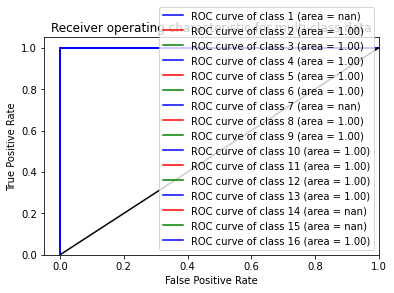

In [70]:
from sklearn.metrics import precision_score, classification_report
print(classification_report(y_train, y_pred, digits=3))

**Plot Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = cnf_matrix_train
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)


#Plotting the confusion matrix
# confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['person_01', 'person_02', 'person_03', 'person_04', 'person_05', 'person_06', 'person_07', 'person_08', 'person_09', 'person_10', 'person_11', 'person_12', 'person_13', 'person_14', 'person_15'] 

#Plotting non-normalized confusion matrix for train
plot_confusion_matrix(y_train, y_pred, classes = class_names,  title = 'Non-Normalized VGG16 Confusion Matrix train')

#Plotting normalized confusion matrix for train
plot_confusion_matrix(y_train, y_pred, classes = class_names, normalize = True, title = 'Normalized VGG16 Confusion matrix train')


#Plotting non-normalized confusion matrix for test
plot_confusion_matrix(y_test, y_test_pred, classes = class_names,  title = 'Non-Normalized VGG16 Confusion Matrix test')

#Plotting normalized confusion matrix test
plot_confusion_matrix(y_test, y_test_pred, classes = class_names, normalize = True, title = 'Normalized VGG16 Confusion matrix test')
